# **PROJECT3: Investigating the gun adquisitions thorughout the US for 2010 and 2016

Introduction: Here i have selected the census-US data as well as the gun-data records from the FBI. The first one (census) shows the population in years 2016 and 2010 as well as a breakdown of the numbers by many criteria (gender, firms, age, etc). The gun data shows the number of permits, kinds of guns, how they were acquired. Both of these data sets break down the numbers by state.

The questions I want to ask are te following:

Which states have had the highest growth in gun registrations?
What is the overall trend of gun purchases?
What census data is most associated with high gun growth?

# **DATA WRANGLING:

In [5]:
# Here we import all the packages to use througout the report
import os
import pandas as pd
import numpy as np
import os.path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#ENTER directory where .py file is
#here you use realtive paths to find your dfs
my_path = os.path.dirname('__file__')
path1 = os.path.join(my_path, "../gun-data.csv")
path2 = os.path.join(my_path, "../u.s.-census-data.csv")

In [12]:
#load data which should be in the same file as the current notebook
df1=pd.read_csv('gun_data.csv')
df2=pd.read_csv('U.S. Census Data.csv')

In [13]:
#In the gun-data there are several cells that don't have values, therefore I will fill those cells with the mean
df1_fill=df1.fillna(df1.mean(), axis=0, inplace=True)
#This data is a little bit more messy so doing the mean doesnt work at the begginging so for now I will add zeros instead
df2_fill=df2.fillna(0, inplace=True)

In [14]:
#here i will get ride of df2 duplicates...df1 has no duplciates
df2.drop_duplicates(inplace=True)

In [15]:
#check if none of the values are null for df1
df1.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [ ]:
#check if none of the values are null for df2
df2.isnull().sum()
#check that the drop duplicates works... should give you a false response
df2.duplicated().value_counts()

# **From now on i will clean up the 2 datasets separatly... First would start with the deartiest df2 (census data)

In [16]:
#Since the fact note is not useful for future analysis we will drop it as well for the df2 data
df2_drop=df2.drop(['Fact Note'], axis=1)
#here i slice to get rid of the meatadata that is at the end of this table
df2_slice=df2_drop[0:63]
#copy the cleaner df2 just to be on the safe side 
census_copy = df2_slice.copy()

In [17]:
#Since the fact column has numbers and symbols thaat are also contained in the dirty table data i will only clean
#what is in all the state columns. For this I have a for loop that would do 2 things: first it would remove
#all the non-digit characters ($,%,F,Z) and ten it would convert eveything into a numeric float

states=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California','Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',    
 'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas',   
 'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts',   
 'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',  
 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',  
 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania',   
 'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah',   
 'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming'] 

# Here is the for loop

for state in states:
 # find all the non-digits with regex
    census_copy[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')  
 # remove all the non digit character  
    census_copy[state]=pd.to_numeric(census_copy[state], downcast='float', errors='ignore')  

In [18]:
#Need to reset index to Fact for posterity
census_copy.set_index('Fact',inplace=True) 

In [19]:
#Since the data in the gun df has the states as rows I will transpose the census data to match that.
#this transposition is needed to eventually merge the 2 datasets

census_cleanT = census_copy.T.reset_index()  
census_cleanT.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010"
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,190.0,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,40.0,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,240.0,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,110.0,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,350.0,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0


In [20]:
#the gun data has 'State' as the index for state and our census has 'index' so now I will match that by renaming index
#column to 'state'
census_cleanT.rename(columns={'index':'state'},inplace = True)

# **Now that we are done with fixing the census dataframe I will continue to do the gun dataframe cleanning

In [21]:
#First i would copy the data just to be on the safe side of not altering something in the original
gun_copy = df1.copy() 

In [22]:
# Here we assign the month to the split column list since we need to slice month from year
split_columns = ['month']

# apply split function to each column of each dataframe copy to just get the year
for c in split_columns:
    gun_copy[c] = gun_copy[c].apply(lambda x: x.split("-")[0])

In [23]:
# here i rename the month to year
gun_rename = gun_copy.rename(columns={'month': 'year'})

In [24]:
#here i am sliceing the gun_clean to year 2010 to just match the census records that start in 2010 and end 2016
gun_clean= gun_rename[495:5115]

In [25]:
#subseting with query to just get the 2016 and 2010 datasets which are the only ones census data
gun_2016 = gun_clean.query('year == "2016"')
gun_2010 = gun_clean.query('year == "2010"')

In [26]:
#Here we group by state, since every year has several totals because of the month subsetting from before
#we will add all the totals for all the monts to have just one total number per state per year
total_2016= gun_2016.groupby(['state'])['totals'].sum().reset_index()  
total_2010= gun_2010.groupby(['state'])['totals'].sum().reset_index() 

In [27]:
#We need to have these totals toguther in te same df so I will rename the totals to indicate the year
total_2016.rename(columns={'totals':'totalGUN_2016'},inplace = True)  
total_2010.rename(columns={'totals':'totalGUN_2010'},inplace = True)

In [28]:
#Here we merged the overlapping data from both totals 
total_GUN = pd.merge(total_2010,total_2016,  on='state', how='inner')

In [29]:
#Finaly we are ready to merge both dataframes gun and census data. Since the only thing in common is the state
# we are doing a inner join on state
combined_df = pd.merge(total_GUN, census_cleanT, on='state', how='inner')
combined_df.head()

,state,totalGUN_2010,totalGUN_2016,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010"
0,Alabama,308607,616947,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,...,190.0,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0
1,Alaska,65909,87647,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,40.0,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0
2,Arizona,206050,416279,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,...,240.0,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0
3,Arkansas,191448,266014,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,...,110.0,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0
4,California,816399,2377167,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,...,350.0,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0


# EDA begins here

QUESTION#1:¶
** Which states have had the highest growth in gun registrations?

Now we are ready to explore the data with some more calculations and graphs. First I will answer question #1. Here I will calculate the growth when you compare 2010 to 2016 data.

In [87]:
#To answer the first question we ave to calculate the %gun growth. I will do so by
#dividing total 2016 by the difference between 2010 and 2016

combined_df['gun_growth'] = combined_df['totalGUN_2016']/(combined_df['totalGUN_2016']-combined_df['totalGUN_2010'])*100

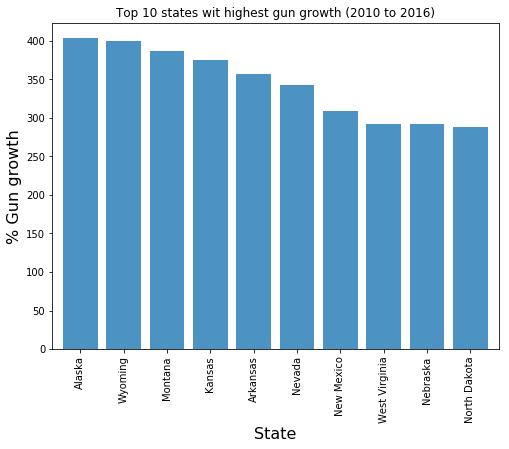

In [88]:
#here to plot the top 10 states with highest gun growth
top10_GUNGROWTH=combined_df.nlargest(10, 'gun_growth')
top10_GUNGROWTH.plot(x='state', y='gun_growth',kind='bar',title='Top 10 states wit highest gun growth (2010 to 2016)',figsize=(8, 6), width=0.8, legend=False,alpha=0.8);
plt.xlabel('State',fontsize=16);
plt.ylabel('% Gun growth',fontsize=16);

Figure1. Top 10 states wit highest gun growth (2010 to 2016). Here we are showing the 10 states in US with highest gun growth in 6 years. The range of growth goes from aproximatly 300% to 200%, for Alaska and North Dakota respectivly.

***Question#2: What is the overall trend of gun purchases?

Here i would address diferent aspects of the gun data. First I would plot the raw gun data by year to see the trend of guns with respect of time. Then I would calculate the gun per capita of 2010 and 2016 to see which states have the high GPC,and i would plot the top5 states for both years. Also I will plot the top 10 states with highest permit rechecks to try to see if states with high GPC have high rechecks. Finally,I will look at the correlation of GPC 2010 and GPC 2016 to see whether this confirms what we find with the raw data.

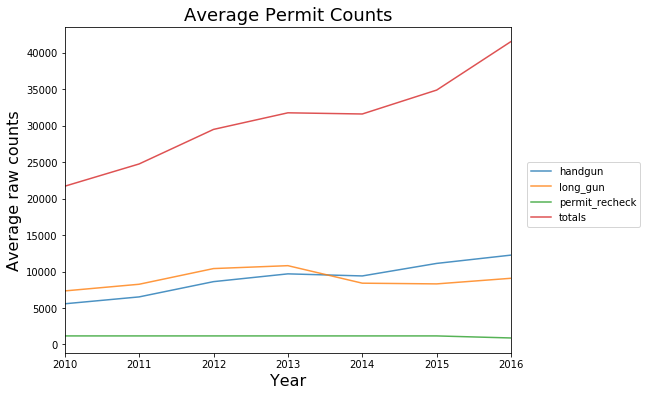

In [35]:
#hERE IS THE OVERALL TREND OF GUN BUYS VS YEAR
gun_clean.groupby('year')[('handgun','long_gun','permit_recheck','totals')].mean().plot(kind='line',figsize=(8, 6),alpha=0.8).set_xticklabels(labels);

# title,labels, legends
labels = ['2010','2011', '2012','2013','2014','2015','2016']  # xtick labels
plt.ylabel('Average raw counts',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.title('Average Permit Counts',fontsize=18)
plt.legend(bbox_to_anchor=(1.3, 0.6)) 

Figure2. Average Permit Counts: This line graph describes the average permit counts from 2011-2016. This graph shows the totals and a bit of the break down of the data by three categories handgun, long_gun and permit rechecks. The totals and hand gun seemed to increase, while the permit reckecks remain unchanged

In [36]:
#tO KNOW THE gun per capita (GPC) we have to calculate it first
#add a column with the gun per capita(GPC) to the combined_df to make axis be similar and easy to plot

combined_df['GPC_2010'] = combined_df['totalGUN_2010']/combined_df['Population estimates base, April 1, 2010,  (V2016)'] 
combined_df['GPC_2016'] = combined_df['totalGUN_2016']/combined_df['Population estimates, July 1, 2016,  (V2016)'] 

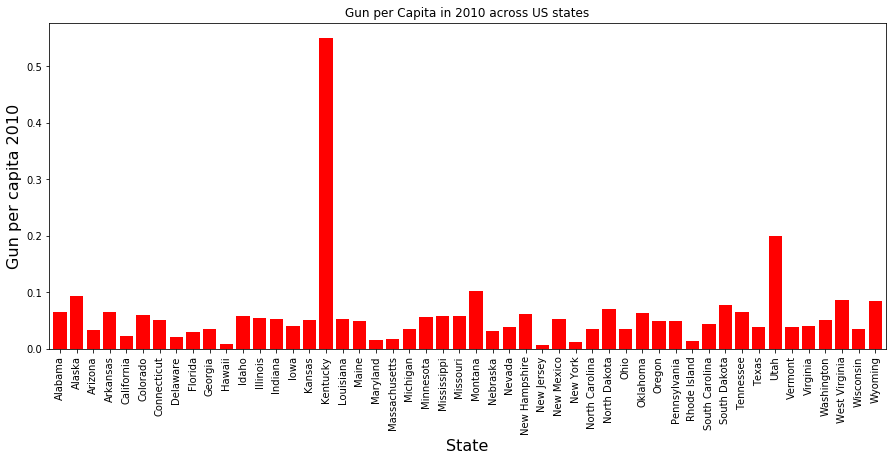

In [70]:
#here i am plotting the gpc_2010
combined_df.plot(x='state', y='GPC_2010',kind='bar',title='Gun per Capita in 2010 across US states',
                 figsize=(15, 6), width=0.8, legend=False,color='red',alpha=1);
plt.xlabel('State',fontsize=16);
plt.ylabel('Gun per capita 2010',fontsize=16);

Figure3. Gun per Capita (GPC) in 2010 across US states: This bar graph shows the GPC in 2010 of the 51 states. Kentucky has the highest GPC while New Jersey has among the smallest GPC

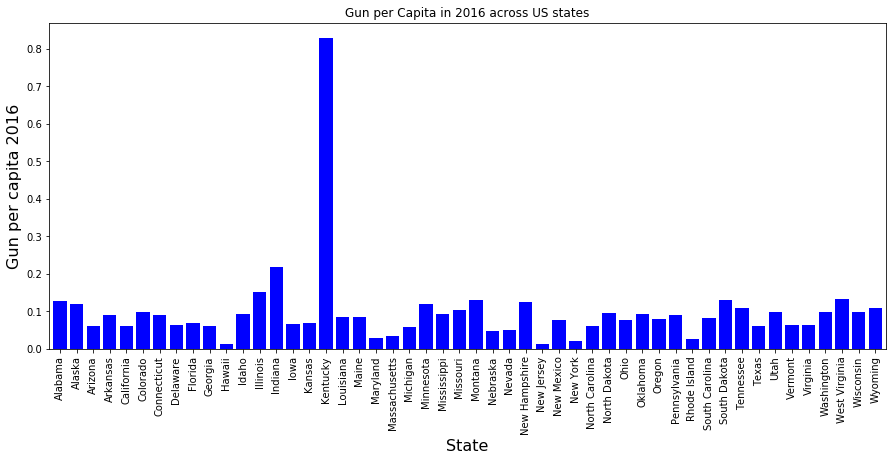

In [69]:
#here i am plotting the gpc_2016
combined_df.plot(x='state', y='GPC_2016',kind='bar',title='Gun per Capita in 2016 across US states',
                 figsize=(15, 6), width=0.8, legend=False,color='blue',alpha=1);
plt.xlabel('State',fontsize=16);
plt.ylabel('Gun per capita 2016',fontsize=16);

Figure4. Gun per Capita (GPC) in 2016 across US states: This bar graph shows the GPC in 2016 of the 51 states. Similar to the 2010 data, Kentucky has the highest GPC while New Jersey has among the smallest GPC

In [43]:
#here we are importing stats to calculate correlation between 2 variblae. For this we need to find the corr coeficient (r2)
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

C:\Users\correap\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


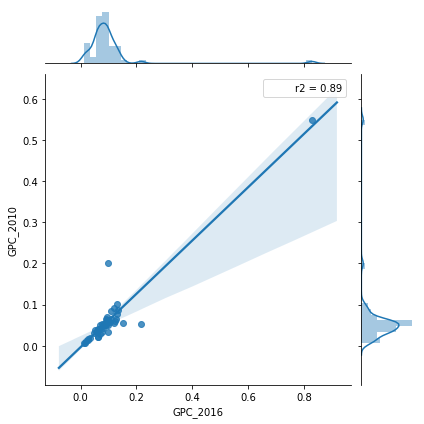

In [55]:
#here i am plotting a scatter plot with regression line toguether with the distribution of the datasets

sns.jointplot(x='GPC_2016', y='GPC_2010', data=combined_df, kind="reg", stat_func=r2)



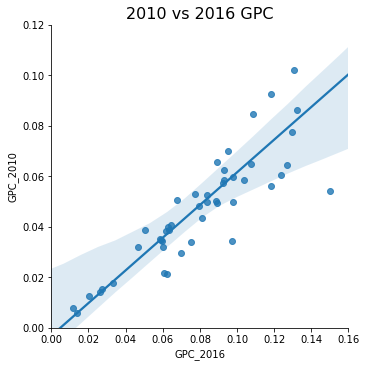

In [57]:
#As you can see from abover ther are few outilers for both variables
#here I am just getting rid of the outliers in the figure so one can see the relationsjhip more esaily
sns.lmplot(x='GPC_2016', y='GPC_2010', data=combined_df);
plt.xlim(0, 0.16)
plt.ylim(0, 0.12)
plt.title ('2010 vs 2016 GPC',fontsize=16);

Figure5. Comparison of the GPC in 2010 with GPC 2016: This scatter plot and regression line shows that the correlation between the GPC in 2010 and the GPC in 2016. Since the regression line is going upwards it suggest a positive correlation. This confirms our observations from the prevoius graph, where states with high GPC in 2010 have a high GPC in 2016

In [58]:
#Now I want to calculate the top 5 states with high GPC for 2010 and 2016
top5_GUN2010=combined_df.nlargest(5, 'GPC_2010')
top5_GUN2016=combined_df.nlargest(5, 'GPC_2016')

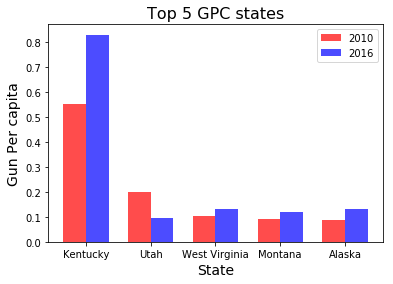

In [60]:
#this code plots 2 consecutive bars to compare how the 2010 top 5 do after 5 years
ind = np.arange(len(top5_GUN2010['state']))  # the x locations for the groups
width = 0.35       # the width of the bars
# plot bars
red_bars = plt.bar(ind, top5_GUN2010['GPC_2010'], width, color='r', alpha=.7, label='2010')
blue_bars = plt.bar(ind+0.35, top5_GUN2010['GPC_2016'], width, color='b', alpha=.7, label='2016')
# title and labels
plt.ylabel('Gun Per capita', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Top 5 GPC states', fontsize=16)
locations = ind + width / 2  # xtick locations
labels = ['Kentucky', 'Utah', 'West Virginia','Montana', 'Alaska']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

Figure6. Top 5 gun per capita (GPC) from 2010 data. This bar graph shows the top 5 States for GPC in 2010 and a comparison with their GPC after 6 years. The only state that seemes to decrease is Utah, the others increase moderatly

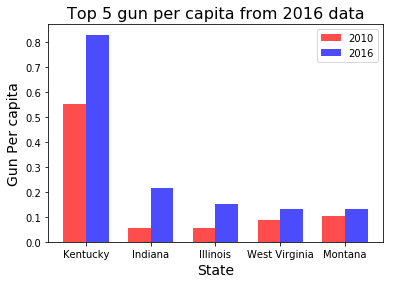

In [61]:
#this code plots 2 consecutive bars to compare how the 2016 top 5 did 5 years ago
ind = np.arange(len(top5_GUN2016['state']))  # the x locations for the groups
width = 0.35       # the width of the bars
# plot bars
red_bars = plt.bar(ind, top5_GUN2016['GPC_2010'], width, color='r', alpha=.7, label='2010');
blue_bars = plt.bar(ind+0.35, top5_GUN2016['GPC_2016'], width, color='b', alpha=.7, label='2016');

# title and labels
plt.ylabel('Gun Per capita', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Top 5 gun per capita from 2016 data', fontsize=16)
locations = ind + width / 2  # xtick locations
labels = ['Kentucky', 'Indiana', 'Illinois', 'West Virginia', 'Montana']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

Figure7. Top 5 gun per capita (GPC) from 2016 data. This bar graph shows the top 5 States for GPC in 2016 and a comparison with their GPC from 6 years ago. All these top 5 states had lower GPC's in 2010

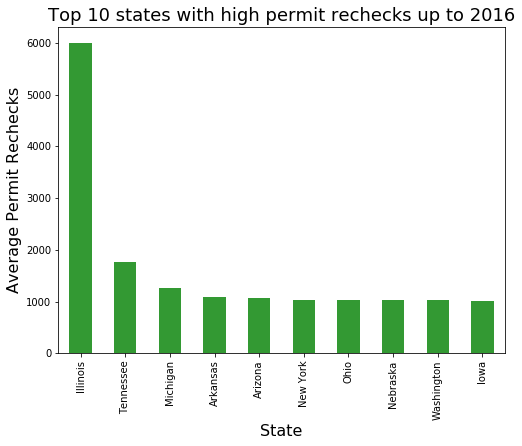

In [67]:
#Here i just want to see if the previously looked at states are ever high in permit rechecks
pc=gun_clean.groupby('state').mean()
top10_PC=pc.nlargest(10, 'permit_recheck')
top10_PC[('permit_recheck')].plot(kind='bar',figsize=(8, 6),color='green',alpha=0.8);
plt.ylabel('Average Permit Rechecks', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.title('Top 10 states with high permit rechecks up to 2016', fontsize=18);

Figure8. Top ten states with high permit rechecks 2016: This bar graph shows the permit rechecks of top 10 states up to 2016. The highest being Illinois and lowest Iowa

**3. What census data is most associated with high gun growth?

Based on my gun growth calculations I will see whether any of the census variables correlate with gun growth. Later on I will pick one of these that has a positive or negative and singly plot it to corroborate the heat map results.

In [89]:

#Here I am going to drop any variable that would indicate gun data excepth for the gun growth to see how 
#every variable relates to evrything and gun_growth
stats_all = combined_df.drop(['GPC_2010','GPC_2016','state','totalGUN_2010','totalGUN_2016'], axis=1)

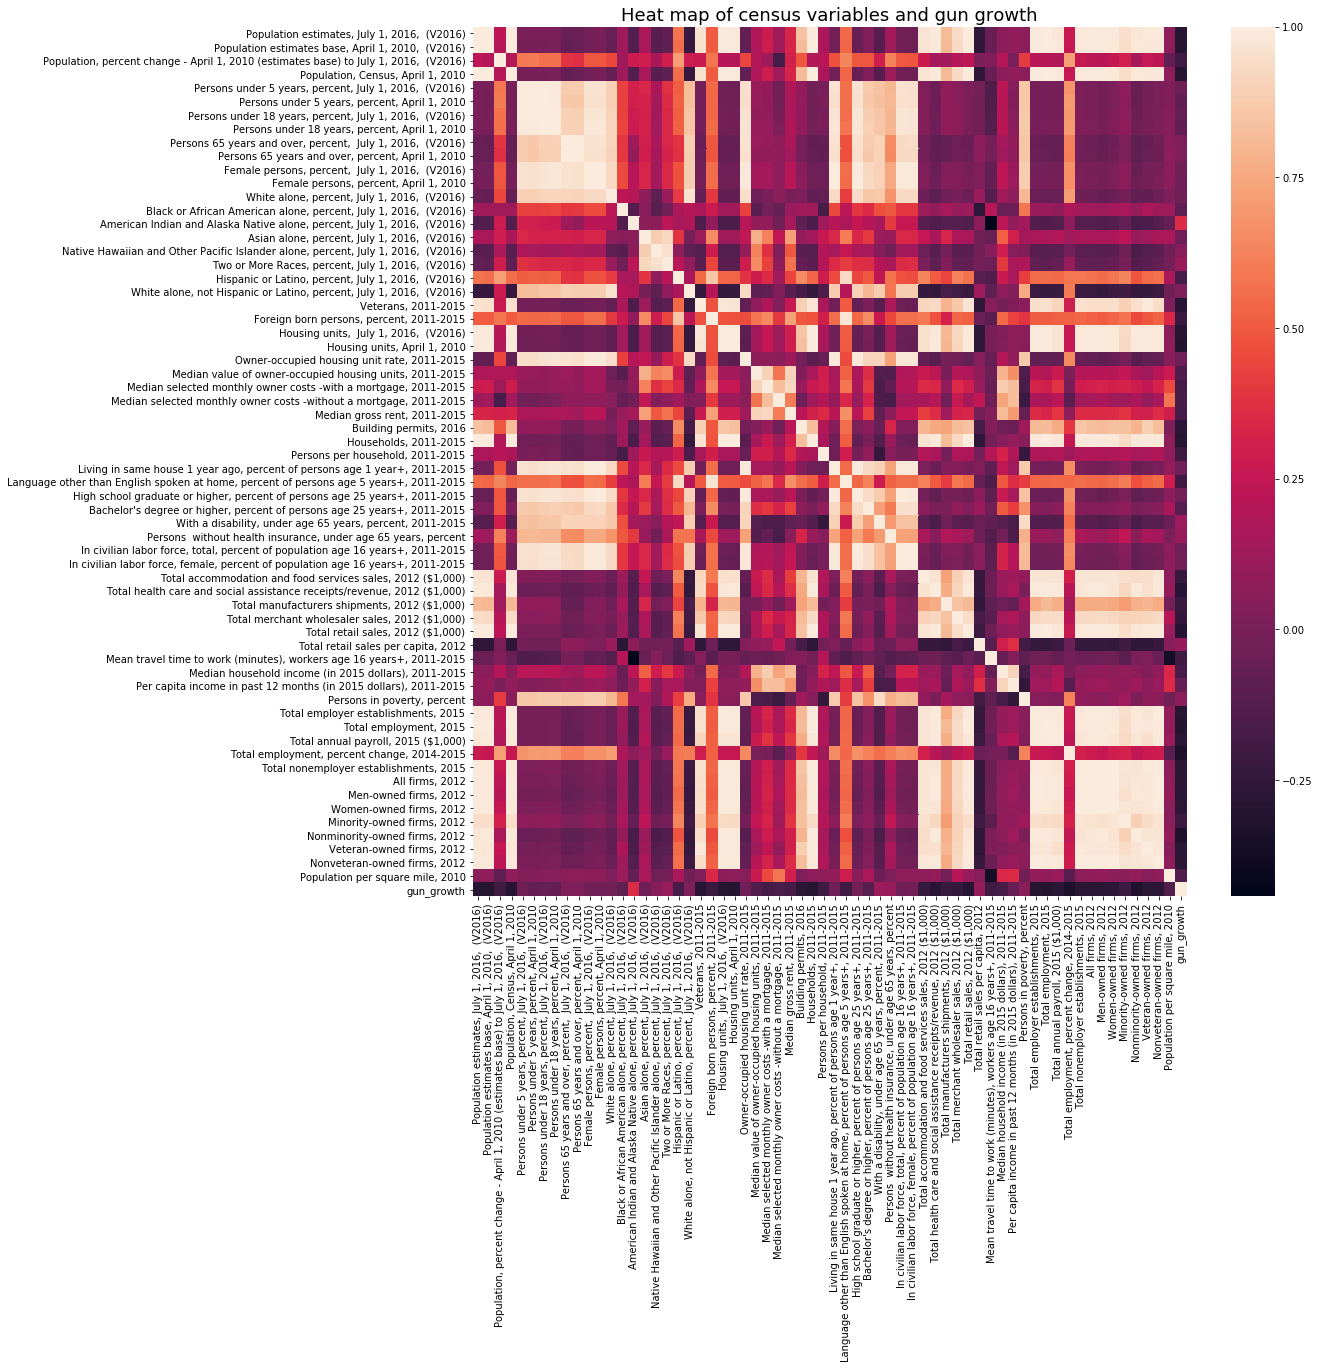

In [90]:
#Calculate correlations
corr2 = stats_all.corr()
# Heatmap with seaborn to show correlations of all variables and gun growth
plt.figure(figsize = (16,16))
sns.heatmap(corr2);
plt.title ('Heat map of census variables and gun growth',fontsize=18);

Figure9: Heatmap of the correlations between census data and gun growth: This color coded heat map shows the correlations amongst different census data categories and gun growth. Positive correlations and negative correlations shown in light and dark colors respectivly.

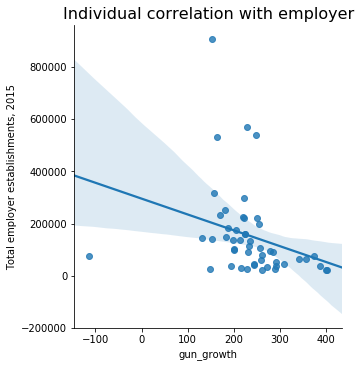

In [92]:
#here i am plotting a regression line to see whetehr the trend is postive, negative or neutral 
#to confirm the heat map fidings and better visualize individual results
#Since there was nothing that seemed positive correlated I just plotted somethign that seemed obviously negative
#correlation susch as total employer establishments

sns.lmplot(x='gun_growth', y='Total employer establishments, 2015', data=stats_all);
#plt.xlim(100, 350)
#plt.ylim(0, 250000)
plt.title ('Individual correlation with employer',fontsize=16);

Figure10. Individual correlation with employer: This scatter plot shows the correlation of total employer establishments in 2015 and gun growth. This shows a realtivly negative correlation similar to what we see in the heat map for this variale

**CONCLUSIONS:

The highest growth of guns were found in Alaska and Wyoming. Among oter states we also find Montana and West Virginia. Overall the gun totals have increased since 2010 until 2016, while overall the permit rechecks remain unchanged. The guns per capita are highest in Kentucky, Utah, West Virginia, Alaska and Montana. This suggests that states like Montana, Alaska and West Virginia have high growth and high per capita. None of these states are high on the overall rechecks.Additionaly, the positive correlation between GPC_10 and GPC_2016 confirms that if a state was higher in 2010 is likely to be higher in 2016. This we individually observed for Kentucky, which is the top one for both years.The highest state for rechecks is Illinois, and this state doesnt appear as a high gun state. As far as any of the census data correlation with high gun growth there wasnt much that would positivly correlate. There were a few negative correlations, such as the total employer in 2015. This might be a limitation of the way the census data was gather, perhaps a more comprehensive break down if it could give us better correlations.